In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import linregress

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

---

In [2]:
C2_activity = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_activity/Received_20240424/240423_OXPHOS_C2_activity assay_iWAT_D10_white, Beige, Mito.xlsx', sheet_name='50ug')
C2_activity_calc = pd.DataFrame({'Sample':C2_activity.columns[1:],
                                 'Activity':[abs(linregress(x=C2_activity['Time (min)'], y=C2_activity[SP])[0]) / 0.0335 for SP in C2_activity.columns[1:]],
                                 })
C2_activity_calc['Group'] = C2_activity_calc['Sample'].str[:5]
C2_activity_calc['rel_Activity'] = C2_activity_calc['Activity'] / C2_activity_calc[C2_activity_calc['Group']=='White']['Activity'].mean()
C2_activity_calc = C2_activity_calc[::-1]
C2_activity['rel_Time'] = C2_activity['Time (min)'] - C2_activity.iloc[0,0]

C2_activity2 = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_activity/Received_20240424/240423_OXPHOS_C2_activity assay_iWAT_D10_white, Beige, Mito.xlsx', sheet_name='100ug')
C2_activity_calc2 = pd.DataFrame({'Sample':C2_activity2.columns[1:],
                                 'Activity':[abs(linregress(x=C2_activity2['Time (min)'], y=C2_activity2[SP])[0]) / 0.0335 for SP in C2_activity2.columns[1:]],
                                 })
C2_activity_calc2['Group'] = C2_activity_calc2['Sample'].str[:5]
C2_activity_calc2['rel_Activity'] = C2_activity_calc2['Activity'] / C2_activity_calc2[C2_activity_calc2['Group']=='White']['Activity'].mean()
C2_activity_calc2 = C2_activity_calc2[::-1]

C2_activity_calc = pd.concat([C2_activity_calc, C2_activity_calc2])
C2_activity_calc['Group'] = pd.Categorical(values=C2_activity_calc['Group'], categories=['Beige','White'])
C2_activity_calc_ = C2_activity_calc.sort_values('rel_Activity', ascending=True).sort_values('Group')

display(C2_activity, C2_activity_calc, C2_activity_calc_)

,Time (min),White_50ug_1,White_50ug_2,White_50ug_3,White_50ug_4,Beige_50ug_1,Beige_50ug_2,Beige_50ug_3,Beige_50ug_4,rel_Time
0,2.350000,0.7861,0.7785,0.7706,0.7623,0.7625,0.7610,0.7371,0.7524,0.000000
1,3.133333,0.7732,0.7669,0.7613,0.7506,0.7455,0.7461,0.7189,0.7339,0.783333
2,3.916667,0.7612,0.7580,0.7545,0.7408,0.7243,0.7290,0.7047,0.7134,1.566667
3,4.700000,0.7472,0.7484,0.7483,0.7305,0.7023,0.7096,0.6924,0.6932,2.350000
4,5.483333,0.7336,0.7379,0.7391,0.7225,0.6811,0.6915,0.6774,0.6751,3.133333
5,6.266667,0.7227,0.7267,0.7293,0.7136,0.6617,0.6760,0.6612,0.6599,3.916667
6,7.050000,0.7138,0.7153,0.7201,0.7039,0.6440,0.6608,0.6446,0.6432,4.700000
7,7.833333,0.7036,0.7050,0.7092,0.6949,0.6279,0.6437,0.6283,0.6268,5.483333
8,8.616667,0.6926,0.6953,0.7010,0.6862,0.6109,0.6248,0.6110,0.6098,6.266667
9,9.400000,0.6837,0.6871,0.6942,0.6769,0.5944,0.6068,0.5942,0.5926,7.050000


,Sample,Activity,Group,rel_Activity
7,Beige_50ug_4,0.614846,Beige,1.883612
6,Beige_50ug_3,0.580265,Beige,1.777670
5,Beige_50ug_2,0.635855,Beige,1.947972
4,Beige_50ug_1,0.668987,Beige,2.049474
3,White_50ug_4,0.322813,White,0.988953
2,White_50ug_3,0.280911,White,0.860584
1,White_50ug_2,0.335760,White,1.028616
0,White_50ug_1,0.366192,White,1.121847
6,Beige_100ug_3,0.635076,Beige,1.116491
5,Beige_100ug_2,0.788926,Beige,1.386966


,Sample,Activity,Group,rel_Activity
6,Beige_100ug_3,0.635076,Beige,1.116491
5,Beige_100ug_2,0.788926,Beige,1.386966
4,Beige_100ug_1,0.798083,Beige,1.403065
6,Beige_50ug_3,0.580265,Beige,1.777670
7,Beige_50ug_4,0.614846,Beige,1.883612
5,Beige_50ug_2,0.635855,Beige,1.947972
4,Beige_50ug_1,0.668987,Beige,2.049474
2,White_50ug_3,0.280911,White,0.860584
2,White_100ug_3,0.538250,White,0.946267
3,White_100ug_4,0.555592,White,0.976755


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50805/1060817756.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=C2_activity_calc_, x="Group", y="rel_Activity",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50805/1060817756.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=C2_activity_calc_, x="Group", y="rel_Activity",


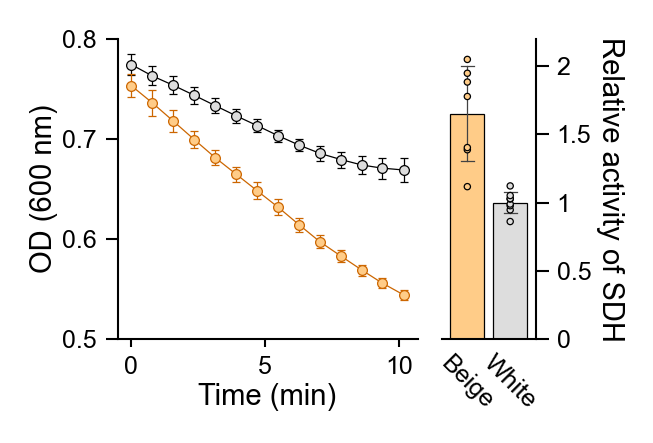

<Figure size 640x480 with 0 Axes>

In [3]:
sF = 1 # Size factor
wgap = 0.08
hgap = 0.1
nrow, ncol = 1, 2

width_ratios = [1, 1/7*2+1/70*2]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


# Line plot
ax = fig.add_subplot(grid[0,0])

ax.scatter(C2_activity['rel_Time'],
           C2_activity[[f'White_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
            s=5.5, c='#DDDDDD',
            lw=0.3, edgecolors='k',
            zorder=3)
ax.plot(C2_activity['rel_Time'],
        C2_activity[[f'White_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
        lw=0.3, c='k')
ax.errorbar(C2_activity['rel_Time'],
            C2_activity[[f'White_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
            yerr=C2_activity[[f'White_50ug_{rep}' for rep in ['1','2','3','4']]].std(axis=1),
            fmt="none", color="k", lw=0.3,
            capsize=1, capthick=0.3)

ax.scatter(C2_activity['rel_Time'],
           C2_activity[[f'Beige_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
            s=5.5, c='#FFCC88',
            lw=0.3, edgecolors='#CC6600',
            zorder=3)
ax.plot(C2_activity['rel_Time'],
        C2_activity[[f'Beige_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
        lw=0.3, c='#CC6600')
ax.errorbar(C2_activity['rel_Time'],
            C2_activity[[f'Beige_50ug_{rep}' for rep in ['1','2','3','4']]].mean(axis=1),
            yerr=C2_activity[[f'Beige_50ug_{rep}' for rep in ['1','2','3','4']]].std(axis=1),
            fmt="none", color="#CC6600", lw=0.3,
            capsize=1, capthick=0.3)

ax.set_ylim(0.5, 0.8)
ax.set_xticks([0,5,10])
ax.set_xticklabels([0,5,10])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', width=0.5, length=2, pad=2)

ax.set_xlabel('Time (min)', labelpad=1)
ax.set_ylabel('OD (600 nm)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# Bar plot
ax = fig.add_subplot(grid[0,1])

sns.barplot(data=C2_activity_calc_, x="Group", y="rel_Activity",
            palette=['#FFCC88','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=C2_activity_calc_, x="Group", y="rel_Activity",
              palette=['#FFCC88','#DDDDDD'],
              size=1.5, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)

ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 2.2)
ax.set_xticks([0,1])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_xticklabels(['Beige','White'], rotation=-45)
ax.set_yticklabels([0, 0.5, 1, 1.5, 2])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative activity of SDH', labelpad=1, rotation=-90, ha='center', va='bottom')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.savefig('CII_activity.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [4]:
from scipy.stats import ttest_ind, ttest_rel

print(ttest_ind(C2_activity_calc[C2_activity_calc['Group']=='Beige']['rel_Activity'],
                C2_activity_calc[C2_activity_calc['Group']=='White']['rel_Activity'],
                ))

Ttest_indResult(statistic=5.157899643760307, pvalue=0.00018411548446044438)


---

In [5]:
C1_activity = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_activity/Received_20240419-2/20240417_OXPHOS complex 1 activity.xlsx', sheet_name='5')
C1_activity_calc = pd.DataFrame({'Sample':C1_activity.columns[1:],
                                 'Activity':[abs(linregress(x=C1_activity['Time (min)'], y=C1_activity[SP])[0]) for SP in C1_activity.columns[1:]],
                                 })
C1_activity_calc['Group'] = C1_activity_calc['Sample'].str[:5]
C1_activity_calc['rel_Activity'] = C1_activity_calc['Activity'] / C1_activity_calc[C1_activity_calc['Group']=='White']['Activity'].mean()
C1_activity['rel_Time'] = C1_activity['Time (min)'] - C1_activity.iloc[0,0]


C1_activity2 = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_activity/Received_20240419-2/20240417_OXPHOS complex 1 activity.xlsx', sheet_name='10')
C1_activity_calc2 = pd.DataFrame({'Sample':C1_activity2.columns[1:],
                                 'Activity':[abs(linregress(x=C1_activity2['Time (min)'], y=C1_activity2[SP])[0]) for SP in C1_activity2.columns[1:]],
                                 })
C1_activity_calc2['Group'] = C1_activity_calc2['Sample'].str[:5]
C1_activity_calc2['rel_Activity'] = C1_activity_calc2['Activity'] / C1_activity_calc2[C1_activity_calc2['Group']=='White']['Activity'].mean()

C1_activity3 = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_activity/Received_20240418/20240414_OXPHOS 1 DATA 4 digit.xlsx', sheet_name='10')
C1_activity_calc3 = pd.DataFrame({'Sample':C1_activity3.columns[1:],
                                 'Activity':[abs(linregress(x=C1_activity3['Time (min)'], y=C1_activity3[SP])[0]) for SP in C1_activity3.columns[1:]],
                                 })
C1_activity_calc3['Group'] = C1_activity_calc3['Sample'].str[:5]
C1_activity_calc3['rel_Activity'] = C1_activity_calc3['Activity'] / C1_activity_calc3[C1_activity_calc3['Group']=='White']['Activity'].mean()

C1_activity_calc = pd.concat([C1_activity_calc, C1_activity_calc2, C1_activity_calc3])
C1_activity_calc['Group'] = pd.Categorical(values=C1_activity_calc['Group'], categories=['Beige','White'])
C1_activity_calc_ = C1_activity_calc.sort_values('rel_Activity', ascending=True).sort_values('Group')

display(C1_activity, C1_activity_calc, C1_activity_calc_)

,Time (min),White-5-1,White-5-3,White-5-4,Beige-5-1,Beige-5-2,Beige-5-3,rel_Time
0,10,0.049,0.051,0.048,0.048,0.051,0.048,0
1,11,0.049,0.051,0.048,0.048,0.051,0.048,1
2,12,0.050,0.051,0.048,0.048,0.051,0.049,2
3,13,0.050,0.051,0.049,0.049,0.051,0.049,3
4,14,0.050,0.052,0.049,0.049,0.051,0.049,4
5,15,0.051,0.052,0.049,0.049,0.051,0.050,5
6,16,0.051,0.052,0.049,0.050,0.051,0.050,6
7,17,0.051,0.053,0.050,0.050,0.051,0.051,7
8,18,0.052,0.053,0.051,0.050,0.051,0.051,8
9,19,0.052,0.054,0.051,0.050,0.052,0.051,9


,Sample,Activity,Group,rel_Activity
0,White-5-1,0.000418,White,0.973790
1,White-5-3,0.000481,White,1.118952
2,White-5-4,0.000390,White,0.907258
3,Beige-5-1,0.000309,Beige,0.719758
4,Beige-5-2,0.000279,Beige,0.650202
5,Beige-5-3,0.000422,Beige,0.982863
0,White-10-4,0.000718,White,0.829915
1,White-10-5,0.000717,White,0.828414
2,White-10-6,0.001161,White,1.341671
3,Beige-10-1,0.000823,Beige,0.951476


,Sample,Activity,Group,rel_Activity
4,Beige-10-2,0.000383,Beige,0.610429
5,Beige-10-3,0.000402,Beige,0.640847
4,Beige-5-2,0.000279,Beige,0.650202
5,Beige-10-4,0.000591,Beige,0.682841
3,Beige-10-1,0.000448,Beige,0.713892
3,Beige-5-1,0.000309,Beige,0.719758
4,Beige-10-3,0.000647,Beige,0.747374
5,Beige-5-3,0.000422,Beige,0.982863
3,Beige-10-1,0.000823,Beige,0.951476
1,White-5-3,0.000481,White,1.118952


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50805/3188531801.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=C1_activity_calc_, x="Group", y="rel_Activity",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50805/3188531801.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=C1_activity_calc_, x="Group", y="rel_Activity",


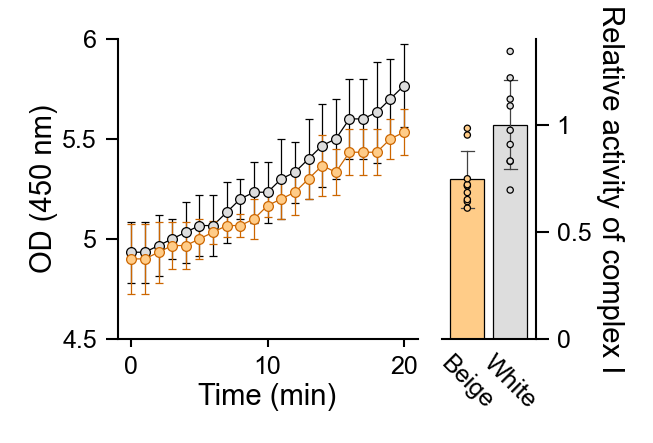

<Figure size 640x480 with 0 Axes>

In [6]:
sF = 1 # Size factor
wgap = 0.08
hgap = 0.1
nrow, ncol = 1, 2

width_ratios = [1, 1/7*2+1/70*2]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


# Line plot
ax = fig.add_subplot(grid[0,0])

ax.scatter(C1_activity['rel_Time'],
           C1_activity[[f'White-5-{rep}' for rep in ['1','3','4']]].mean(axis=1),
            s=5.5, c='#DDDDDD',
            lw=0.3, edgecolors='k',
            zorder=3)
ax.plot(C1_activity['rel_Time'],
        C1_activity[[f'White-5-{rep}' for rep in ['1','3','4']]].mean(axis=1),
        lw=0.3, c='k')
ax.errorbar(C1_activity['rel_Time'],
            C1_activity[[f'White-5-{rep}' for rep in ['1','3','4']]].mean(axis=1),
            yerr=C1_activity[[f'White-5-{rep}' for rep in ['1','3','4']]].std(axis=1),
            fmt="none", color="k", lw=0.3,
            capsize=1, capthick=0.3)

ax.scatter(C1_activity['rel_Time'],
           C1_activity[[f'Beige-5-{rep}' for rep in ['1','2','3']]].mean(axis=1),
            s=5.5, c='#FFCC88',
            lw=0.3, edgecolors='#CC6600',
            zorder=3)
ax.plot(C1_activity['rel_Time'],
        C1_activity[[f'Beige-5-{rep}' for rep in ['1','2','3']]].mean(axis=1),
        lw=0.3, c='#CC6600')
ax.errorbar(C1_activity['rel_Time'],
            C1_activity[[f'Beige-5-{rep}' for rep in ['1','2','3']]].mean(axis=1),
            yerr=C1_activity[[f'Beige-5-{rep}' for rep in ['1','2','3']]].std(axis=1),
            fmt="none", color="#CC6600", lw=0.3,
            capsize=1, capthick=0.3)

ax.set_ylim(0.045, 0.06)
ax.set_xticks([0,10,20])
ax.set_yticks([0.045, 0.05, 0.055, 0.06])
ax.set_xticklabels([0,10,20])
ax.set_yticklabels([4.5, 5, 5.5, 6])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', width=0.5, length=2, pad=2)

ax.set_xlabel('Time (min)', labelpad=1)
ax.set_ylabel('OD (450 nm)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# Bar plot
ax = fig.add_subplot(grid[0,1])

sns.barplot(data=C1_activity_calc_, x="Group", y="rel_Activity",
            palette=['#FFCC88','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=C1_activity_calc_, x="Group", y="rel_Activity",
        #       palette=['none','none'],
              palette=['#FFCC88','#DDDDDD'],
              size=1.5, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)

ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 1.4)
ax.set_xticks([0,1])
ax.set_yticks([0, 0.5, 1])
ax.set_xticklabels(['Beige','White'], rotation=-45)
ax.set_yticklabels([0, 0.5, 1])
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative activity of complex I', labelpad=1, rotation=-90, ha='center', va='bottom')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.savefig('CI_activity.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [7]:
from scipy.stats import ttest_ind, ttest_rel

print(ttest_ind(C1_activity_calc[C1_activity_calc['Group']=='Beige']['rel_Activity'],
                C1_activity_calc[C1_activity_calc['Group']=='White']['rel_Activity'],
                ))

Ttest_indResult(statistic=-3.0994594083815494, pvalue=0.006887675056995992)


---

In [8]:
C2reltoC1 = pd.DataFrame({'rel_Activity':[C2_activity_calc[C2_activity_calc['Group']=='Beige']['rel_Activity'].mean() / C1_activity_calc[C1_activity_calc['Group']=='Beige']['rel_Activity'].mean(),
                                          C2_activity_calc[C2_activity_calc['Group']=='White']['rel_Activity'].mean() / C1_activity_calc[C1_activity_calc['Group']=='White']['rel_Activity'].mean()],
                          'Group' : ['Beige','White']})

display(C2reltoC1)

,rel_Activity,Group
0,2.21945,Beige
1,1.00000,White


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_50805/22274492.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=C2reltoC1, x="Group", y="rel_Activity",


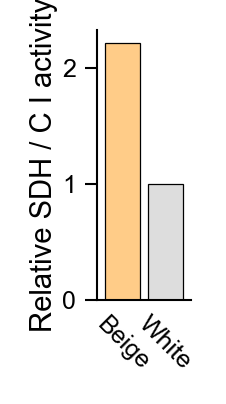

<Figure size 640x480 with 0 Axes>

In [9]:
sF = 1 # Size factor
wgap = 0.4
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*2 +1/70*2]
height_ratios = [0.9]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

# C II / C I activity
ax = fig.add_subplot(grid[0,0])

sns.barplot(data=C2reltoC1, x="Group", y="rel_Activity",
            palette=['#FFCC88','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

ax.set_xlim(-0.6, 1.6)
ax.set_xticks([0,1])
ax.set_yticks([0, 1, 2])
ax.set_xticklabels(['Beige','White'], rotation=-45)
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative SDH / C I activity', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('CII-relto-CI_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()